# Students' survey

Let's explore your answers!

In [3]:
# load libraries
library(data.table)
library(ggplot2)
library(wordcloud)
library(tm)
library(RColorBrewer)

Loading required package: RColorBrewer

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




# Functions

In [ ]:
create_wordcloud = function(text, my_stopwords=NULL, max_words=200) {

    text = Corpus(VectorSource(text))
    text = suppressWarnings(tm_map(text, removePunctuation))
    text = suppressWarnings(tm_map(text, stripWhitespace))
    text = suppressWarnings(tm_map(text, content_transformer(tolower)))
    text = suppressWarnings(tm_map(text, removeWords, stopwords("english")))
    text = suppressWarnings(tm_map(text, removeWords, my_stopwords))

    dtm = TermDocumentMatrix(text) 
    matrix = as.matrix(dtm) 
    words = sort(rowSums(matrix),decreasing=TRUE) 
    df = data.frame(word = names(words),freq=words)

    set.seed(1234)
    suppressWarnings(
        wordcloud(words = df$word, freq = df$freq, min.freq = 1, 
        max.words=max_words, random.order=FALSE, colors=brewer.pal(8, "Dark2"))
    )
}

In [25]:
# Read data

In [8]:
dat = fread("../data/fstudents.csv")
names(dat) = c('time', 'interest', 'years_design', 
    'years_analysis', 'power', 'languages', 'working', 'position', 'eposition')
print(paste('number of rows:', nrow(dat)))

[1] "number of rows: 15"


In [26]:
str(dat)

Classes ‘data.table’ and 'data.frame':	15 obs. of  9 variables:
 $ time          : chr  "2022/11/07 10:35:33 AM GMT+1" "2022/11/07 10:46:23 AM GMT+1" "2022/11/07 10:50:20 AM GMT+1" "2022/11/07 11:09:42 AM GMT+1" ...
 $ interest      : chr  "I am very interested in learning the intricacies of survey methodology, particularly how to identify interviewe"| __truncated__ "Analysing the results of it" "Building and performing accurate statiscal analyses" "how to avoid biases when writting a question" ...
 $ years_design  : chr  "No experience" "1 or less than a year" "No experience" "1 or less than a year" ...
 $ years_analysis: chr  "1 or less than a year" "1 or less than a year" "1 or less than a year" "1 or less than a year" ...
 $ power         : int  4 1 3 0 3 0 3 0 5 1 ...
 $ languages     : chr  "R" "R" "R" "None (I usually don't program);R" ...
 $ working       : chr  "No, I'm not working at this moment" "No, I'm not working at this moment" "No, I'm not working at this moment" "No, I

# Experience / Knowledge

In [31]:
prop.table(table(dat$years_analysis))


1 or less than a year                     2                     3 
           0.46666667            0.06666667            0.06666667 
        No experience 
           0.40000000 

In [32]:
prop.table(table(dat$years_design))


1 or less than a year         No experience 
            0.2666667             0.7333333 

In [29]:
print(round(mean(dat$power), 3))


[1] 2.067


In [30]:
print(round(mean(sample(0:5, 10000, replace=TRUE)), 3))

[1] 2.475


In [33]:
prop.table(table(dat$working))


No, I'm not working at this moment                     Yes, full-time 
                        0.80000000                         0.13333333 
                    Yes, part-time 
                        0.06666667 

# Wordclouds

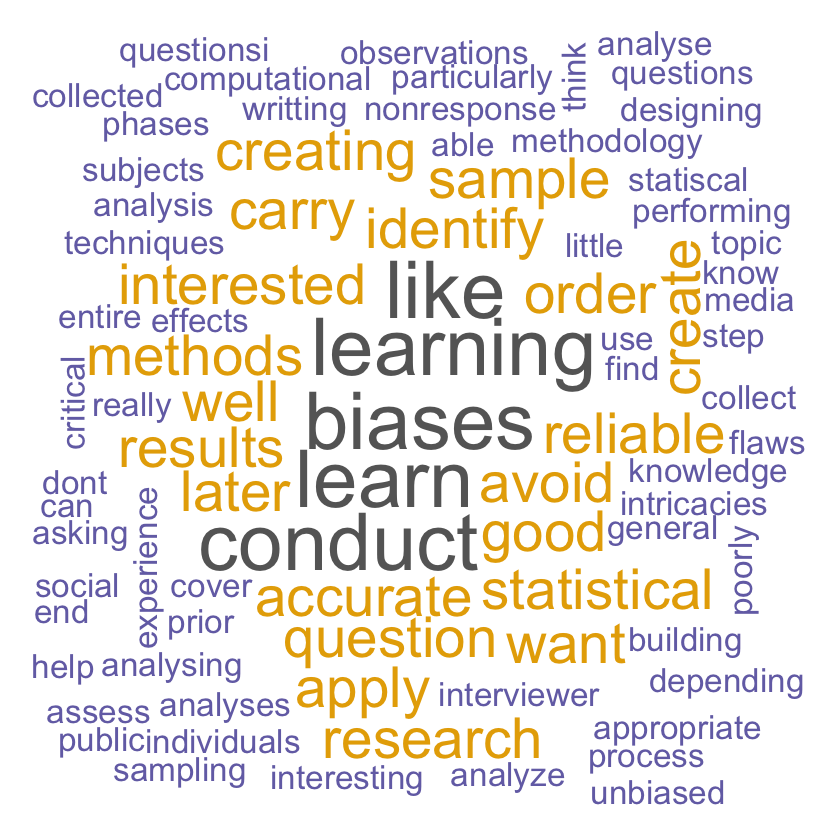

In [14]:
create_wordcloud(dat$interest, c('survey', 'surveys', 'data', 'stop'))

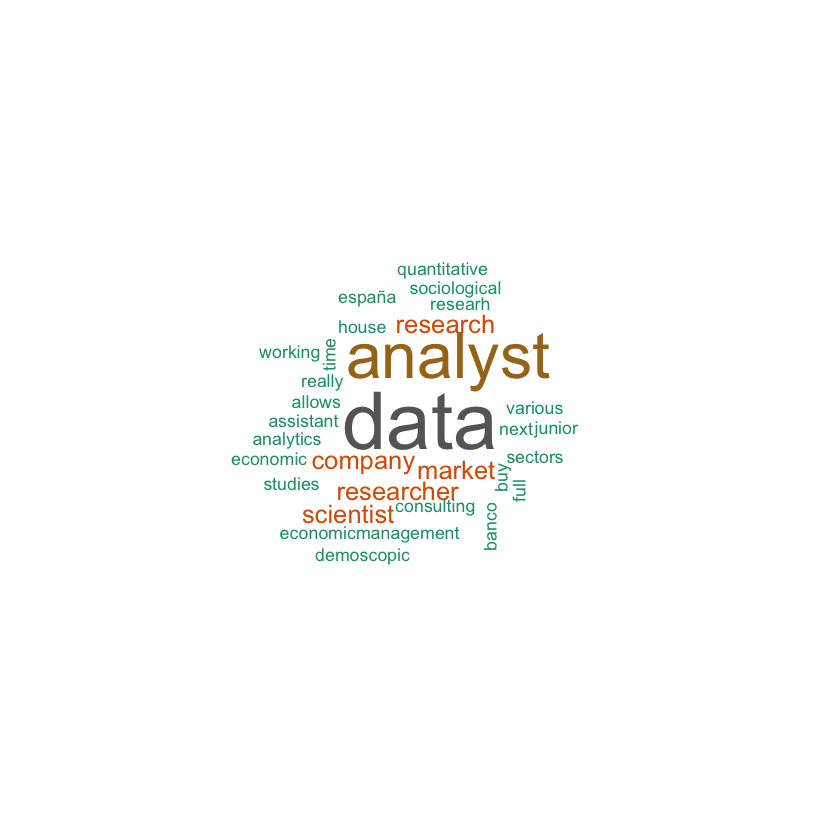

In [15]:
# set figure size using options in R
create_wordcloud(dat$eposition, c('one', 'years', 'like'))